Рассмотрим данные:

|       | x<sub>1</sub> | x<sub>2</sub> | x<sub>3</sub> | x<sub>4</sub> | x<sub>5</sub> | x<sub>6</sub> | x<sub>7</sub> | x<sub>8</sub> |
| :---: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: |
| **A** |      4.4       |      3.6       |      2.7       |      10.3       |      8      |      9      |      3.1      |      8.3      |
| **B** |      4.8       |      3.6       |      6.3       |      4.9       |      3.2      |      4.2      |      4.9      |      4.4      |

Есть ядро (функция сходства):
$$
K({\bf x}_i,{\bf x}_j)=||{\bf x}_i-{\bf x}_j||^2\\
$$

1. Построить диаграмму рассеяния точек **x<sub>i</sub>** (оси подписать, пронумеровать точки)
2. Рассчитать ядерную матрицу


## Задание 2
Рассмотрим данные в виде матрицы **D**:

| ***X<sub>1</sub>*** | ***X<sub>2</sub>*** |
| :-----------------: | :-----------------: |
|         0         |         33         |
|         6         |         82         |
|         -6         |         85         |
|         -13         |         35         |
|         -13         |         -62         |
|         23         |         49         |
|         1         |         22         |
|         -12         |         0         |

1. Построить диаграмму рассеяния (оси подписать, пронумеровать точки)

2. Рассчитайте среднее **μ** для матрицы **D**, ковариационную матрицу **Σ** для матрицы **D** и ковариационную матрицу **Σ<sub>c</sub>**  для центрированной матрицы **D**

3. Рассчитайте собственные числа и собственные вектора для матрицы **Σ<sub>c</sub>**

4. Выведите индекс (порядковый номер), соответствующий первой главной компоненте

5. Рассчитайте первый главный компонент. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)

6. Используя PCA из библиотеки sklearn, получите первую главную компоненту для матрицы **D**. Постройте точечный график полученного вектора (пронумеровать точки)

7. Визуально сравните графики, полученные в пунктах **5** и **6**. Убедитесь в корректности выполнения преобразований. Сохранен ли порядок точек? 

   Выведите название оси графика из пункта 1, проекция данных на которую сравнима с результатами PCA преобразований

8. **μ** и **Σ** сверху задают нормальное распределение, из которого были сгенерированы точки. Постройте диаграмму рассеяния, которая позволит определить ориентацию / размеры облака точек, полученного с помощью 2-мерной функции плотности вероятности. 

   На отдельном линейном графике постройте графики функций плотностей вероятности отдельных компонентов 2-мерного нормального распределения

## Задание 3

1. Для данных и ядра из первого задания найдите первую главную компоненту при нелинейном преобразовании для заданного ядра. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)
2. Используя KernelPCA из библиотеки sklearn с ядром Гаусса и гаммой = 1, получите первую главную компоненту для данных из первого задания. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)
3. Визуально сравните графики, полученные в пунктах **1** и **2**. Определите, использование какого ядра (из первого задания или ядра Гаусса) позволяет, на ваш взгляд, лучше визуально выделить принадлежность точки к одному из двух кластеров


In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as stats
import pylab as pl

In [40]:
#Задание 1
from scipy.spatial.distance import pdist,squareform
xAB=[[4.4,4.8],[3.6,3.6],[2.7,6.3],[10.3,4.9],[8,3.2],[9,4.2],[3.1,4.9],[8.3,4.4]]
x=squareform(pdist(xAB))**2
K=pd.DataFrame(x)
K


0      1      2      3      4      5      6      7
0   0.00   2.08   5.14  34.82  15.52  21.52   1.70  15.37
1   2.08   0.00   8.10  46.58  19.52  29.52   1.94  22.73
2   5.14   8.10   0.00  59.72  37.70  44.10   2.12  34.97
3  34.82  46.58  59.72   0.00   8.18   2.18  51.84   4.25
4  15.52  19.52  37.70   8.18   0.00   2.00  26.90   1.53
5  21.52  29.52  44.10   2.18   2.00   0.00  35.30   0.53
6   1.70   1.94   2.12  51.84  26.90  35.30   0.00  27.29
7  15.37  22.73  34.97   4.25   1.53   0.53  27.29   0.00

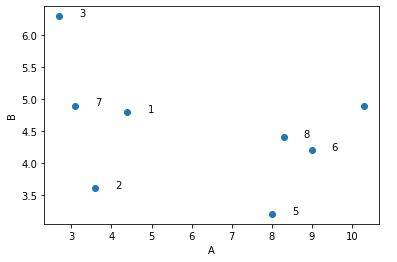

In [3]:
fig, axs = plt.subplots()
plt.subplots_adjust(wspace=1, hspace=1)
A=[4.4,3.6,2.7,10.3,8,9,3.1,8.3]
B=[4.8,3.6,6.3,4.9,3.2,4.2,4.9,4.4]
axs.scatter(A,B)
plt.xlabel("A")
plt.ylabel("B")
for i in range(0,len(A)):
    plt.annotate(i+1, xy=(A[i] + 0.5,B[i]))

plt.show()

[[-0.41866114]
 [-0.38818492]
 [-0.27293928]
 [-0.00748316]
 [ 0.26952468]
 [ 0.63508423]
 [-0.47266214]
 [ 0.65532173]]


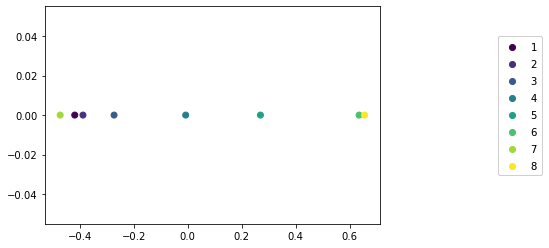

In [50]:
#Задание 3.2
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=1, kernel='rbf',gamma=1)

K_kernel = transformer.fit_transform(xAB)
print(K_kernel)
fig, axs = plt.subplots()
cValue = list(range(1,9))
sca=axs.scatter(K_kernel, np.zeros(8), c=cValue)
legend1=axs.legend(*sca.legend_elements(),loc="lower right", bbox_to_anchor=(1.5, 0.2)) 
axs.add_artist(legend1) 
plt.show()

[ 28.94988162+0.j  39.31514994+0.j  59.21722801+0.j -65.29892854+0.j
 -31.93779086+0.j -45.91180234+0.j  49.96488955+0.j -34.29862737+0.j]


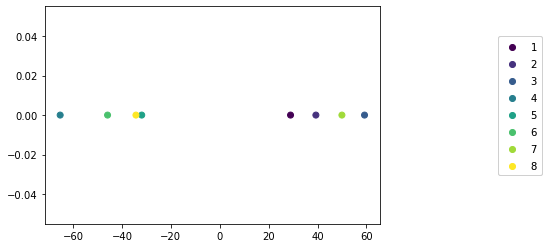

In [87]:
#3.1
#Нормализация матрицы К
size = 8
E= np.ones((size, size))
M0 = np.eye(size)
centeredM = np.dot((M0 - 1/size*E), x)
centeredM = np.dot(centeredM, (M0 - 1/size*E))
value, vector = np.linalg.eig(centeredM)

maxM = 0
for i in range(size):
    if(abs(value[i]) > abs(maxM)):
        index=i
        maxM = value[i]
maxV = vector[:,index]
if(maxM < 0):
    maxV = -maxV

m = np.dot(maxV, centeredM)
print(m)

fig, axs = plt.subplots()
sca=axs.scatter(m, np.zeros(8), c=cValue)
legend1=axs.legend(*sca.legend_elements(),loc="lower right", bbox_to_anchor=(1.5, 0.2)) 
axs.add_artist(legend1) 


На первом графике легче определить к какому кластеру относится точка

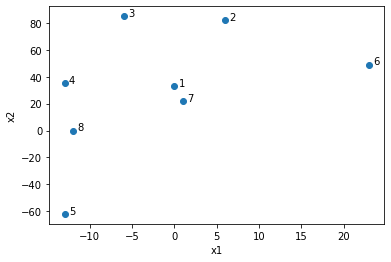

In [6]:
#Задание 2
x1=[0,6,-6,-13,-13,23,1,-12]
x2=[33,82,85,35,-62,49,22,0]
fig, axs = plt.subplots()
plt.subplots_adjust(wspace=1, hspace=1)
axs.scatter(x = x1, y = x2)
plt.xlabel("x1")
plt.ylabel("x2")
for i in range(0,len(x1)):
    plt.annotate(i+1, xy=(x1[i] + 0.5,x2[i]))

plt.show()

In [7]:
from sklearn.decomposition import PCA

D=np.vstack((x1,x2))
print("Матрица D:\n",D)

sredneeD = [np.mean(x1), np.mean(x2)]
print("Среднее:", sredneeD)

covD=np.cov(D)
print("Ковариционная матрица D\n",covD)

Dcentered = (D[0] - np.mean(x1), D[1] - np.mean(x2))
print ("Центрированнная матрица D: \n",Dcentered)

covDcentered=np.cov(Dcentered)
print("Ковариционная матрица Dcentered:\n",covDcentered)

Матрица D:
 [[  0   6  -6 -13 -13  23   1 -12]
 [ 33  82  85  35 -62  49  22   0]]
Среднее: [-1.75, 30.5]
Ковариционная матрица D
 [[ 151.35714286  272.71428571]
 [ 272.71428571 2221.42857143]]
Центрированнная матрица D: 
 (array([  1.75,   7.75,  -4.25, -11.25, -11.25,  24.75,   2.75, -10.25]), array([  2.5,  51.5,  54.5,   4.5, -92.5,  18.5,  -8.5, -30.5]))
Ковариционная матрица Dcentered:
 [[ 151.35714286  272.71428571]
 [ 272.71428571 2221.42857143]]


In [8]:
w,v= np.linalg.eig(covDcentered)
print(w)
print(v)

[ 116.03216491 2256.75354938]
[[-0.99171496 -0.12845792]
 [ 0.12845792 -0.99171496]]


In [9]:
index_com=np.argmax(w)
print("Индекс,соответствующий первой главной компоненте:",index_com)



Индекс,соответствующий первой главной компоненте: 1


[ -2.70408876 -52.06886934 -53.50251922  -3.01756576  93.17878544
 -21.52606022   8.07631789  31.56399996]


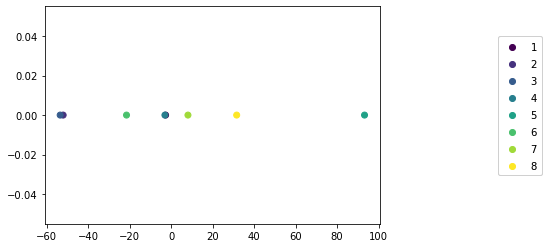

In [10]:
_, vecs = np.linalg.eig(covDcentered)
v = vecs[:,1]
Dnew = np.dot(v,Dcentered)
print (Dnew)
fig, axs = plt.subplots()
sca=axs.scatter(Dnew, np.zeros(8), c=cValue)
legend1=axs.legend(*sca.legend_elements(),loc="lower right", bbox_to_anchor=(1.5, 0.2)) 
axs.add_artist(legend1) 


[[ -2.70408876]
 [-52.06886934]
 [-53.50251922]
 [ -3.01756576]
 [ 93.17878544]
 [-21.52606022]
 [  8.07631789]
 [ 31.56399996]]


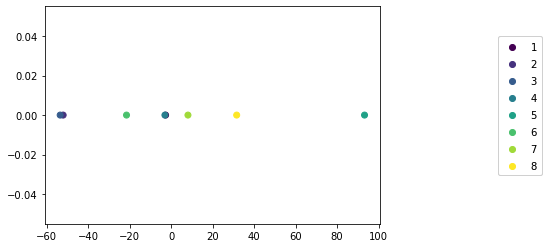

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca_D = pca.fit_transform(np.transpose(D))
print(pca_D)
fig, axs = plt.subplots()
sca=axs.scatter(pca_D, np.zeros(8), c=cValue)
legend1=axs.legend(*sca.legend_elements(),loc="lower right", bbox_to_anchor=(1.5, 0.2)) 
axs.add_artist(legend1) 

In [12]:
if(np.var(x1)>np.var(x2)):
    print("Ось x1 сравнима с результатами PCA преобразований")
else: print("Ось x2 сравнима с результатами PCA преобразований")

Ось x2 сравнима с результатами PCA преобразований


Преобразования выполнены корректны. Порядок точек сохранен.

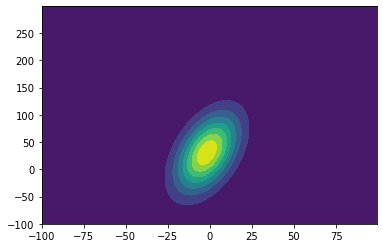

-1.75
12.302729081677075
30.5
47.13203338949606


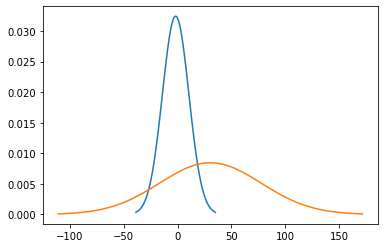

In [28]:
from scipy.stats import multivariate_normal
from scipy.stats import norm
x, y = np.mgrid[-100:100, -100:300]
pos = np.dstack((x, y))
rv=multivariate_normal(sredneeD, covD)
fig = plt.figure()
ax=fig.add_subplot()
ax.contourf(x, y, rv.pdf(pos))
plt.show()

Mx1 = np.mean(x1)
print(Mx1)
sigma1 = math.sqrt(covD[0,0])
print(sigma1)
x_1 = np.linspace(Mx1 - 3*sigma1, Mx1 + 3*sigma1, 100)
x1_norm=stats.norm.pdf(x_1, Mx1, sigma1)
Mx2 = np.mean(x2)
print(Mx2)
sigma2 = math.sqrt(covD[1,1])
print(sigma2)
x_2 = np.linspace(Mx2 - 3*sigma2, Mx2 + 3*sigma2, 100)
x2_norm=stats.norm.pdf(x_2, Mx2, sigma2 )
plt.plot(x_1, x1_norm)
plt.plot(x_2, x2_norm)

plt.show()
